In [122]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [123]:
#define parameters
sigma = 2
mu = 7

In [124]:
#Creating Functions.
def gaussPDF(x):
    fx = 1/(sigma*(math.sqrt(2*math.pi))) * math.exp(-0.5*((x-mu)/sigma)**2)
    return fx

def gaussCDF(x):
    fx = 0.5*math.erf((x-mu)/(sigma*(math.sqrt(2))))
    return fx

def gaussxCDF(x):
    fx = 0.5*mu*math.erf((x-mu)/(sigma*(math.sqrt(2)))) - \
         sigma*math.exp(-(x-mu)**2/(2*sigma**2))/math.sqrt(sigma*2)
    return fx

def evap(w):
    fx = gaussxCDF(w)  - gaussxCDF(0) + w*(gaussCDF(20)-gaussCDF(w))
    return fx

In [125]:
x = np.linspace(0,20,200)

In [126]:
y = [gaussPDF(i) for i in x]

Text(0, 0.5, 'Probability Density')

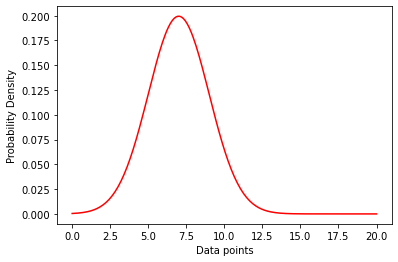

In [127]:
#Plotting the Results
plt.plot(x,y , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability Density')

In [128]:
yc = [gaussCDF(i) - gaussCDF(0) for i in x]

Text(0, 0.5, 'Probability')

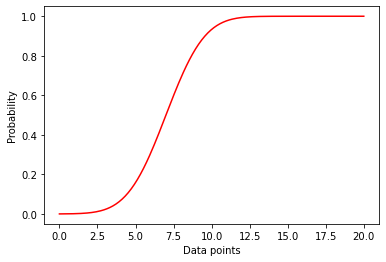

In [129]:
plt.plot(x,yc , color = 'red')
plt.xlabel('Data points')
plt.ylabel('Probability')

In [130]:
yxc = [gaussxCDF(i) - gaussxCDF(0) for i in x]

Text(0, 0.5, 'new average')

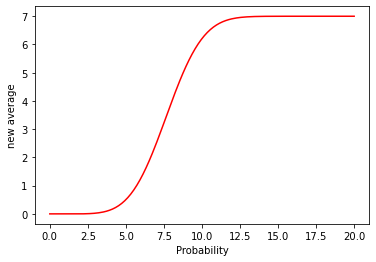

In [131]:
plt.plot(x,yxc , color = 'red')
plt.xlabel('Probability')
plt.ylabel('new average')

In [132]:
w = [ evap(i) for i in x]

Text(0, 0.5, 'evaped water')

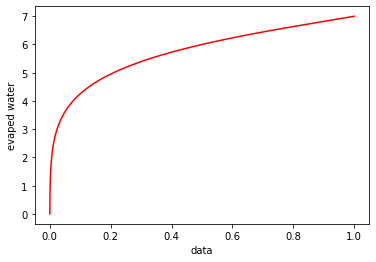

In [133]:
plt.plot(yc, w, color = 'red')
plt.xlabel('data')
plt.ylabel('evaped water')

In [147]:
from scipy.optimize import curve_fit

In [158]:
def func(x, a, b, c, d, e, f):
    return a * np.exp(b * x) + c * x + d * x**2 + e * x**3 + f

In [159]:
xdata = yc
ydata = w

popt, pcov = curve_fit(func, xdata, ydata)
popt

array([  1.24531423,   0.07244232,  22.94017497, -36.89773605,
        19.24062697,   0.42949096])

In [172]:
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

TypeError: can't multiply sequence by non-int of type 'numpy.float64'

In [173]:
yy = [1.24531423 * np.exp(0.07244232 * x) + 22.94017497 * x + -36.89773605 \
      * x**2 + 19.24062697 * x**3 + 0.42949096 for x in yc]

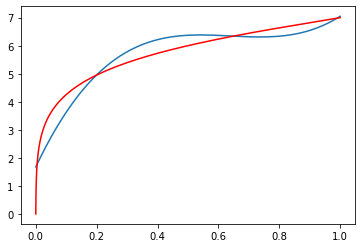

In [175]:
plt.plot(yc, yy)
plt.plot(yc, w, color = 'red')

In [177]:
import pandas as pd

In [222]:
braL = [ "(" for i in w ]
braR = [ ")" for i in w ]

In [223]:
DataAll=[braL, w, yc, braR]

In [224]:
DataAll = np.transpose(DataAll)

In [225]:
data = pd.DataFrame(DataAll)

In [226]:
data.loc[-1] = ['(', None, None, None]  # adding a row
data.index = data.index + 1  # shifting index
data = data.sort_index()  # sorting by index
data.loc[len(data)] = [None, None, None, ')']  # adding a row

In [227]:
data 

,0,1,2,3
0,(,None,None,None
1,(,0.0,0.0,)
2,(,0.10039244140907591,4.7925185575503626e-05,)
3,(,0.20076510991036803,0.00010491992149852525,)
4,(,0.3011148383698178,0.000172529657971765,)
...,...,...,...,...
197,(,7.0005590863850236,0.9997673708127782,)
198,(,7.000559086487903,0.9997673708430199,)
199,(,7.000559086561894,0.9997673708649466,)
200,(,7.000559086614656,0.9997673708808045,)


In [228]:
data.to_csv("moistureGaussianConv.csv", index=False, header=False, sep=' ')